In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import keras.src.backend
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import InputLayer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD
import keras_tuner

In [ ]:
np.random.seed(0)

Let us first get the processed data to train the model

In [11]:
input_df = pd.read_csv('processed_input.csv')
output_df = pd.read_csv('processed_output.csv')
display(input_df)
display(output_df)

,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,price,minimum_nights,maximum_nights,...,Bathroom essentials,Baby safety gates,Bread maker,Clothing storage,Full kitchen,Fireplace guards,Sound system,EV charger,Outdoor furniture,Lake access
0,0.735956,0.0,0.000759,1.0,0.0,0.066667,0.0,0.002761,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.577049,0.0,0.000759,1.0,1.0,0.066667,0.0,0.006653,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.523716,0.0,0.000759,1.0,0.0,0.066667,0.0,0.004852,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.573115,0.0,0.000759,1.0,1.0,0.066667,0.0,0.003052,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.493989,0.0,0.000759,1.0,0.0,0.066667,0.0,0.003168,0.001002,0.013138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168318,0.467760,0.0,0.000759,1.0,1.0,0.066667,0.0,0.006653,0.000000,0.000070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168319,0.577486,0.0,0.000759,1.0,1.0,0.066667,0.0,0.003168,0.006012,0.000164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168320,0.704044,0.0,0.000759,1.0,1.0,0.066667,0.0,0.002587,0.005010,0.000339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168321,0.447213,0.0,0.000759,1.0,1.0,0.066667,0.0,0.005782,0.002004,0.000199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,review_scores_rating
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0
...,...
168318,100.0
168319,100.0
168320,100.0
168321,100.0


Let us split the data into training and testing data with a 80/20 split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)

Let us create a preliminary model just to see how it performs on the given data

In [18]:
model_relu = Sequential()
model_relu.add(InputLayer(input_shape=(247,)))
model_relu.add(Dense(units = 32, activation='relu'))
model_relu.add(Dense(units = 16, activation='relu'))
model_relu.add(Dense(units = 1, activation= 'relu'))
model_relu.compile(optimizer='adam', loss = 'mean_squared_error')
model_relu.optimizer.learning_rate=0.1

In [19]:
history = model_relu.fit(x_train, y_train, validation_split=0.1, batch_size=1000, epochs=100)

Epoch 1/100
122/122 [==============================] - 2s 7ms/step - loss: 431.2870 - val_loss: 107.1106
Epoch 2/100
122/122 [==============================] - 1s 5ms/step - loss: 96.5747 - val_loss: 96.2758
Epoch 3/100
122/122 [==============================] - 1s 5ms/step - loss: 91.6397 - val_loss: 98.9747
Epoch 4/100
122/122 [==============================] - 1s 6ms/step - loss: 91.4188 - val_loss: 94.2018
Epoch 5/100
122/122 [==============================] - 1s 5ms/step - loss: 91.2276 - val_loss: 93.9876
Epoch 6/100
122/122 [==============================] - 1s 5ms/step - loss: 92.6329 - val_loss: 94.3682
Epoch 7/100
122/122 [==============================] - 1s 5ms/step - loss: 91.5424 - val_loss: 94.3494
Epoch 8/100
122/122 [==============================] - 1s 5ms/step - loss: 91.4023 - val_loss: 97.8853
Epoch 9/100
122/122 [==============================] - 1s 4ms/step - loss: 91.9517 - val_loss: 100.2993
Epoch 10/100
122/122 [==============================] - 1s 4ms/step - 

As we can see, the loss and validation loss both start out high and decrease very quickly at the beginning. However, at some point, the validation loss stops improving, while the training loss continues to decrease gradually, which suggests that the model might be overfitting. To avoid this issue, we should utilize the early stopping call back when making our model.

Now that we have seen the performance of this preliminary model, let us do some hyperparameter tuning to build a more optimal model

In [ ]:
def buildHPmodel(hp):
  activation = hp.Choice("activation", ['elu','relu','leaky_relu'])
  layers = hp.Int("hidden_layers", min_value=2, max_value=4, step=1)
  nodes = hp.Choice("layer_one_nodes", [32, 64, 128])
  optimizer = hp.Choice("optimizer", ['rmsprop','adam'])
  lr = hp.Float("lr", min_value=0.01, max_value=0.1, step=3, sampling="log")

  model = Sequential()
  model.add(InputLayer(input_shape=(247,)))

  for i in range(0, layers):
    model.add(Dense(units=nodes/pow(2, i), activation=activation))

  model.add(Dense(units=1, activation=activation))
  model.compile(optimizer=optimizer, loss='mean_squared_error')
  model.optimizer.learning_rate = lr
  return model

For our possible activation functions, we chose elu, relu, and leaky_relu. It doesn't make sense to choose sigmoid, tanh, or softmax because we want the final layer to output a numeric prediction, not a classification. We also decided to vary the number of hidden layers, the number of nodes per layer, the optimizer, and the learning_rate

In [ ]:
hp = keras_tuner.HyperParameters()
tuner = keras_tuner.RandomSearch(
    hypermodel=buildHPmodel,
    objective="val_loss",
    max_trials=50,
    executions_per_trial=5,
    tune_new_entries=True,
    allow_new_entries=True,
    max_consecutive_failed_trials=1,
    overwrite = True
)
tuner.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'elu', 'conditions': [], 'values': ['elu', 'relu', 'leaky_relu'], 'ordered': False}
hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
layer_one_nodes (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
optimizer (Choice)
{'default': 'rmsprop', 'conditions': [], 'values': ['rmsprop', 'adam'], 'ordered': False}
lr (Float)
{'default': 0.01, 'conditions': [], 'min_value': 0.01, 'max_value': 0.1, 'step': 3, 'sampling': 'log'}


In [ ]:
tuner.search(x_train, y_train, batch_size=1000, epochs=3, validation_split=0.1)

Trial 50 Complete [00h 00m 34s]
val_loss: 657.87490234375

Best val_loss So Far: 92.93961029052734
Total elapsed time: 00h 30m 32s


In [ ]:
tuner.results_summary(num_trials=5)

Results summary
Results in ./untitled_project
Showing 5 best trials
Objective(name="val_loss", direction="min")

Trial 29 summary
Hyperparameters:
activation: elu
hidden_layers: 2
layer_one_nodes: 128
optimizer: adam
lr: 0.09
Score: 92.93961029052734

Trial 12 summary
Hyperparameters:
activation: elu
hidden_layers: 3
layer_one_nodes: 64
optimizer: adam
lr: 0.03
Score: 93.16603240966796

Trial 44 summary
Hyperparameters:
activation: elu
hidden_layers: 3
layer_one_nodes: 128
optimizer: adam
lr: 0.03
Score: 93.39307403564453

Trial 34 summary
Hyperparameters:
activation: relu
hidden_layers: 4
layer_one_nodes: 128
optimizer: adam
lr: 0.01
Score: 94.07543640136718

Trial 41 summary
Hyperparameters:
activation: elu
hidden_layers: 4
layer_one_nodes: 64
optimizer: adam
lr: 0.03
Score: 94.12674407958984


It looks like the best performing model used the following parameters:

`activation = elu`

`hidden_layers = 2`

`layer_one_nodes = 128`

`optimizer = adam`

`learning_rate = 0.09`

Let's get this model and run it longer to see if we can increase its accuracy

In [15]:
best_model = Sequential()
best_model.add(InputLayer(input_shape=(247,)))
best_model.add(Dense(units = 128, activation='elu'))
best_model.add(Dense(units = 64, activation='elu'))
best_model.add(Dense(units = 1, activation= 'elu'))
best_model.compile(optimizer='adam', loss = 'mean_squared_error')
best_model.optimizer.learning_rate=0.09


Let's also utilize the early_stopping call back function to avoid overfitting our model

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

We'll use a validation_split of 0.1 in order to create our validation data, which we'll use as a measure for our early stopping

In [16]:
best_history = best_model.fit(x_train, y_train, validation_split=0.1, batch_size=1000, epochs=100, callbacks = [early_stopping])

Epoch 1/100
122/122 [==============================] - 2s 12ms/step - loss: 425.0935 - val_loss: 93.0547
Epoch 2/100
122/122 [==============================] - 1s 9ms/step - loss: 89.1570 - val_loss: 92.4553
Epoch 3/100
122/122 [==============================] - 1s 9ms/step - loss: 88.6346 - val_loss: 92.7042
Epoch 4/100
122/122 [==============================] - 2s 13ms/step - loss: 88.3483 - val_loss: 94.6862
Epoch 5/100
122/122 [==============================] - 2s 15ms/step - loss: 88.5638 - val_loss: 92.6972
Epoch 6/100
122/122 [==============================] - 1s 12ms/step - loss: 88.3848 - val_loss: 92.4389
Epoch 7/100
122/122 [==============================] - 1s 9ms/step - loss: 87.5985 - val_loss: 92.3613
Epoch 8/100
122/122 [==============================] - 1s 9ms/step - loss: 88.2383 - val_loss: 91.8247
Epoch 9/100
122/122 [==============================] - 1s 8ms/step - loss: 87.5252 - val_loss: 92.6734
Epoch 10/100
122/122 [==============================] - 1s 9ms/step 

As we can see, the fitting stopped shortly after the validation loss stopped improving, which means that our early_stopping callback worked.

### Analysis:
In our initial neural network, we used the leaky_relu activation function on all layers and we used the adam optimizer, in addition to the following specifications:

In [ ]:
model_relu.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                15872     
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17985 (70.25 KB)
Trainable params: 17985 (70.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


For now, let's see how this model performs

In [24]:
yhat_test = model_relu.predict(x_test)
testing_error = mean_squared_error(y_test, yhat_test)
print('Testing Error: ', testing_error)

1053/1053 [==============================] - 2s 2ms/step
Testing Error:  95.92000653147883


 During fitting, the training error continuously went down, ending up at around 83.8 after 100 epochs. However, the validation error decreased to about 92.6 before going back up and varying in the 93 to 94 range. The testing error was ended up higher, at around 95.9. This suggests that there may have been some overfitting towards the end of the fitting for this model. We kept these values in mind as we worked on creating a better model.

Text(0.5, 1.0, 'Loss Over Epochs for preliminary model')

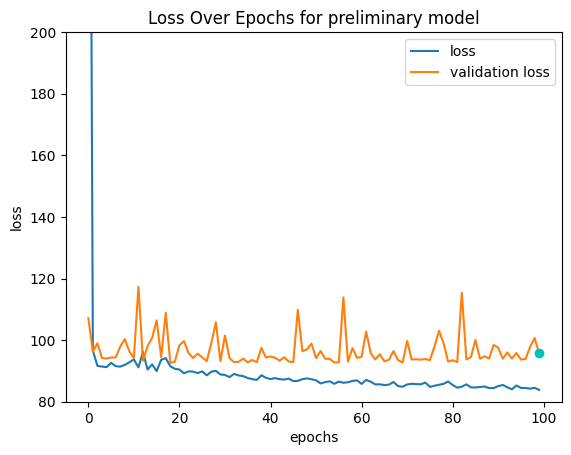

In [26]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.plot(99, testing_error, 'oc')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.ylim(80, 200)
plt.title('Loss Over Epochs for preliminary model')

We then performed hyperparameter tuning to find the optimal model, which used the following parameters:

`activation = elu`

`hidden_layers = 2`

`layer_one_nodes = 128`

`optimizer = adam`

`learning_rate = 0.09`

Now that we have our finalized model, let's run it on our testing data to get our testing error:

In [21]:
yhat_test = best_model.predict(x_test)
best_testing_error = mean_squared_error(y_test, yhat_test)
print('Testing Error:', best_testing_error)

1053/1053 [==============================] - 2s 2ms/step
Testing Error: 92.16142107699649


For this model, the we implemented early_stopping to avoid the issue of overfitting. Thus, the model stopped after only 23 epochs. Compared to the preliminary model, the validation_error was a little lower, going down to around 91.8 at its minimum before going back up and stopping. The testing error ended up being around 92.1, which is a little better than our original model's testing error of 93.3.

Text(0.5, 1.0, 'Loss Over Epochs for Final Model')

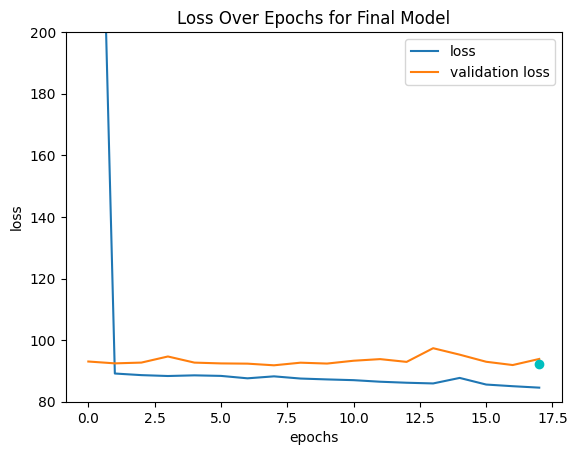

In [23]:
plt.plot(best_history.history['loss'], label="loss")
plt.plot(best_history.history['val_loss'], label="validation loss")
plt.plot(17, best_testing_error, 'oc')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.ylim(80, 200)
plt.title('Loss Over Epochs for Final Model')

From these graphs, we can clearly see that for both models, the preliminary one and our final one, the errors started pretty close to each other, but they gradually separated after that, with the training_error consistently decreasing and the validation_error leveling off or even increasing. Since we set restore_best_weights to True, the final testing_loss is pretty close the minimum validation_loss instead of the final validation_loss.

### Conclusion:

After exploring multiple Neural Network models, we came to the conclusion that Neural Networks were not the most optimal models for predicting AirBNB reviews given our dataset. In both our preliminary model and our final model, the testing errors were much higher than they were in some of our other models, which suggests that these other models are performing better on the test data than our Dense Neural Networks.

One possible improvement we could make is to increase max_trials for the hyperparameter tuning. Since we were restricted by time, we were not able to test all possible combinations during our hyperparameter tuning, so there may be more optimal combinations than the ones we tried. Additionally, we could also try running for more epochs during our hyperparameter tuning in order to get a better representation of each model. One pattern we noticed is that the models with higher learning_rates did a little better, but this may be due to the fact that they move towards the local minima faster than the models with lower learning_rates, which makes them appear more accurate in the short-run.